# Descriptive Statistics and Python Implementation

In this assignment we are going to study about descriptive statistics methods and also we are going to implement the methods using python(with and without library functions)

Topics to be covered are as below
1. Mean
2. Median
3. Mode
4. Variance
5. Standard Deviation
6. Correlation
7. Normal Distribution
8. Feature of Normal Distribution
9. Positively Skewed & Negatively Skewed Normal Distribution
10. Effect on Mean, Median and Mode due to Skewness
11. Explain QQ Plot and show the implementation of the same
12. Explain Box Cox and show the implementation of the same

In statistics, the data are often stored in a tabular format (like a spreadsheet) in a CSV file.

For better understanding let’s get started by visualizing the data in our CSV file using PANDAS library.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

my_dataset=pd.read_csv(r'C:\Users\dell\Desktop\Innomatics\data.csv')
my_dataset.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


Use read_csv method to read the raw data in the CSV file into a data frame, my_dataset . The data frame is a two-dimensional array-like data structure for statistical and machine learning models.

Use head() method of the data frame to show the first five rows of the data.

# MEAN

##### Mean is an average of all the numbers.

The steps required to calculate a mean are:
sum up all the values of a target variable in the dataset and then divide the sum by the number of values

For example, if we have a set of five values, [70, 60, 85, 80, 92]

            here, Mean=(70+60+85+80+92)/5= 77.4
            
 $$\mu=\Sigma{(values)}/n$$

Now let us implement this with and without python libraries

In [26]:
#with library function
mean_with_libfunc=my_dataset.mean()
print(mean_with_libfunc)

Mthly_HH_Income           41558.00
Mthly_HH_Expense          18818.00
No_of_Fly_Members             4.06
Emi_or_Rent_Amt            3060.00
Annual_HH_Income         490019.04
No_of_Earning_Members         1.46
dtype: float64


In [27]:
#with library function for specific coloumn
average_with_libfunc=my_dataset['Mthly_HH_Income'].mean()
print(average_with_libfunc)

41558.0


In [28]:
#without library function
number_of_values=len(my_dataset['Mthly_HH_Income'])
sum_of_data=sum(my_dataset['Mthly_HH_Income'])
mean_without_libfunc=sum_of_data/number_of_values
print(mean_without_libfunc)

41558.0


# MEDIAN

Median is the middle value of a sorted list of numbers. 
The steps required to get a median from a list of numbers are:

sort the numbers from smallest to highest

if the list has an odd number of values, 
the value in the middle position is the median

$$median=\frac{(\frac{n}{2})^{th}term+(\frac{n}{2}+1)^{th}term}{2} $$

if the list has an even number of values, 
the average of the two values in the middle will be the median

$$median=\frac{n+1}{2}^{th}term $$

In [29]:
#with library function median()
med_with_libfunc=my_dataset.median()
print(med_with_libfunc)

Mthly_HH_Income           35000.0
Mthly_HH_Expense          15500.0
No_of_Fly_Members             4.0
Emi_or_Rent_Amt               0.0
Annual_HH_Income         447420.0
No_of_Earning_Members         1.0
dtype: float64


In [30]:
#with library function median() for specific coloumn
med_with_libfunc=my_dataset['Mthly_HH_Income'].median()
print(med_with_libfunc)

35000.0


In [31]:
#without library function
sorted_data=sorted(my_dataset['Mthly_HH_Income'])
size_of_data=len(sorted_data)
if(size_of_data%2==0):
    even_n_term=int(size_of_data/2)
    even_n1_term=int((size_of_data/2))-1
    median_data=(sorted_data[even_n_term]+sorted_data[even_n1_term])/2
else:
    odd_n_term=int((size_of_data+1)/2)
    median_data=sorted_data[odd_n_term]
print(median_data)

35000.0


# MODE

The mode is the value that appears most frequently in a data set.

It is a measure of central tendency.

A set of data may have one mode, more than one mode, or no mode at all.

In [32]:
#with library function
mod_with_libfunc=my_dataset.mode()
print(mod_with_libfunc)

   Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  Emi_or_Rent_Amt  \
0            45000             25000                  4                0   

   Annual_HH_Income Highest_Qualified_Member  No_of_Earning_Members  
0            590400                 Graduate                      1  


In [33]:
#with library function on a selected coloumn
mod_with_libfunc=my_dataset['Mthly_HH_Income'].mode()
print(mod_with_libfunc)

0    45000
dtype: int64


In [34]:
#without library function
#creating user defined mode function
def my_mode(data):
    n=0
    my_values={}
    for i in sorted(data):
        my_values.setdefault(i,0)
        my_values[i]+=1
    for i,j in my_values.items():
        if j==max(my_values.values()):
            freq_values=i
    return freq_values

#Calling the defined function
my_mode(my_dataset['Mthly_HH_Income'])

45000

# VARIANCE

The term variance refers to a statistical measurement of the spread between numbers in a data set.
In statistics, variance measures variability from the average or mean. 
It is calculated by taking the 
1. differences between each number in the data set and 
2. the mean, 
3. then squaring the differences to make them positive, and finally 
4. dividing the sum of the squares by the number of values in the data set.

$$\sigma^{2}=\frac{1}{n}\sum_{i=1}^{n}(x_i-\mu_x)^{2} $$


In [35]:
#with library function
var_with_libfunc=np.var(my_dataset)
print(var_with_libfunc)

Mthly_HH_Income          6.674788e+08
Mthly_HH_Expense         1.432499e+08
No_of_Fly_Members        2.256400e+00
Emi_or_Rent_Amt          3.817640e+07
Annual_HH_Income         1.004372e+11
No_of_Earning_Members    5.284000e-01
dtype: float64


In [36]:
#with library function on selected coloumn
var_with_libfunc=np.var(my_dataset['Mthly_HH_Income'])
print(var_with_libfunc)

667478836.0


In [37]:
#without library function
length=len(my_dataset['Mthly_HH_Income'])
sum_of_data=sum(my_dataset['Mthly_HH_Income'])
mean=sum_of_data/length
sum_var=0
for i in my_dataset['Mthly_HH_Income']:
    sum_square=(i-mean)**2
    sum_var+=sum_square
my_variance=sum_var/length
print(my_variance)

667478836.0


# STANDARD DEVIATION

The standard deviation (SD) is just a measurement to tell how a set of values spread out from their mean. 
A low SD shows that the values are close to the mean and a high SD shows a high diversion from the mean.

The steps to calculate SD are as follows:
1. Calculate the mean of a dataset
2. For each number in the dataset, subtract it with the mean
3. Square the difference obtained from Step 2
4. Sum up the results from Step 3
5. Divide the summation from Step 4 by the number of values in the dataset minus one
6. Square root the result from Step 5

$$\sigma=\sqrt{\frac{1}{n}\sum{i=1}^{n}(x{i}-\mu_{x})^{2}} $$


In [38]:
#with library function
std_with_libfunc=np.std(my_dataset)
print(std_with_libfunc)

Mthly_HH_Income           25835.611779
Mthly_HH_Expense          11968.704023
No_of_Fly_Members             1.502132
Emi_or_Rent_Amt            6178.705366
Annual_HH_Income         316918.265315
No_of_Earning_Members         0.726911
dtype: float64


In [39]:
#with library function on selected coloumn
std_with_libfunc=np.std(my_dataset['Mthly_HH_Income'])
print(std_with_libfunc)

25835.611779092826


In [40]:
#without library function
length=len(my_dataset['Mthly_HH_Income'])
sum_of_data=sum(my_dataset['Mthly_HH_Income'])
mean=sum_of_data/length
sum_var=0
for i in my_dataset['Mthly_HH_Income']:
    sum_square=(i-mean)**2
    sum_var+=sum_square
print((sum_var/length)**0.5)

25835.611779092826


# CORRELATION

Correlation is a statistic that measures the degree to which two variables move in relation to each other.

The number varies from -1 to 1.

$$\rho{x,y}=\frac{cov(x,y)}{\sigma_{x}*\sigma_{y}} $$ 

Here, cov (x,y) is covariance of x and,y

$\sigma_{x}$ is standard deviation of x and $\sigma_{y}$ is standard deviation of y.

In [41]:
#with library function
corr_with_libfunc=my_dataset.corr()
print(corr_with_libfunc)

                       Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  \
Mthly_HH_Income               1.000000          0.649215           0.448317   
Mthly_HH_Expense              0.649215          1.000000           0.639702   
No_of_Fly_Members             0.448317          0.639702           1.000000   
Emi_or_Rent_Amt               0.036976          0.405280           0.085808   
Annual_HH_Income              0.970315          0.591222           0.430868   
No_of_Earning_Members         0.347883          0.311915           0.597482   

                       Emi_or_Rent_Amt  Annual_HH_Income  \
Mthly_HH_Income               0.036976          0.970315   
Mthly_HH_Expense              0.405280          0.591222   
No_of_Fly_Members             0.085808          0.430868   
Emi_or_Rent_Amt               1.000000          0.002716   
Annual_HH_Income              0.002716          1.000000   
No_of_Earning_Members        -0.097431          0.296679   

                       No

In [42]:
#without library function
coloumn_x=my_dataset['Mthly_HH_Income']
coloumn_y=my_dataset['Annual_HH_Income']
cov=np.cov(coloumn_x,coloumn_y)[0,1]
std_x=coloumn_x.std() 
std_y=coloumn_y.std() 
correlation_data=(cov/(std_x*std_y))
print(correlation_data)

0.9703154166603712


# NORMAL DISTRIBUTION

The normal distribution is a form presenting data by arranging the probability distribution of each value in the data.

A normal distribution, sometimes called the bell curve(shown as below), is a distribution that occurs naturally in many situations

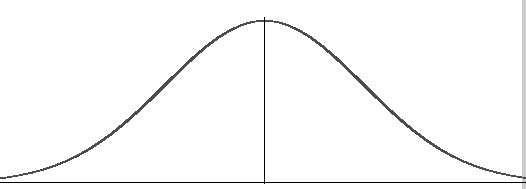

Most values remain around the mean value making the arrangement symmetric.

The standard deviation controls the spread of the distribution. 
1. A smaller standard deviation indicates that the data is tightly clustered around the mean; the normal distribution will be taller. 
2. A larger standard deviation indicates that the data is spread out around the mean; the normal distribution will be flatter and wider.

#### Properties of a normal distribution
1. The mean, mode and median are all equal.
2. The curve is symmetric at the center (i.e. around the mean, μ).
3. Exactly half of the values are to the left of center and exactly half the values are to the right.
4. The total area under the curve is 1.

#### Function of normal distribution is shown as below

$$f(x,\mu,\sigma)=\frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-(x-\mu)^{2}}{2\sigma^{2}}} $$


# Feature of Normal Distribution

For a normally distributed variable in a population the mean is the best measure of central tendency, and the standard deviation(s) provides a measure of variability.

We can use the mean and standard deviation to get a handle on probability. It turns out that, as demonstrated in the figure below,

Approximately 68% of values in the distribution are within 1 SD of the mean, i.e., above or below.
P (µ - σ < X < µ + σ) = 0.68

Approximately 95% of values in the distribution are within 2 SD of the mean.
P (µ - 2σ < X < µ + 2σ) = 0.95

Approximately 99% of values in the distribution are within 3 SD of the mean.
P (µ - 3σ < X < µ + 3σ) = 0.99
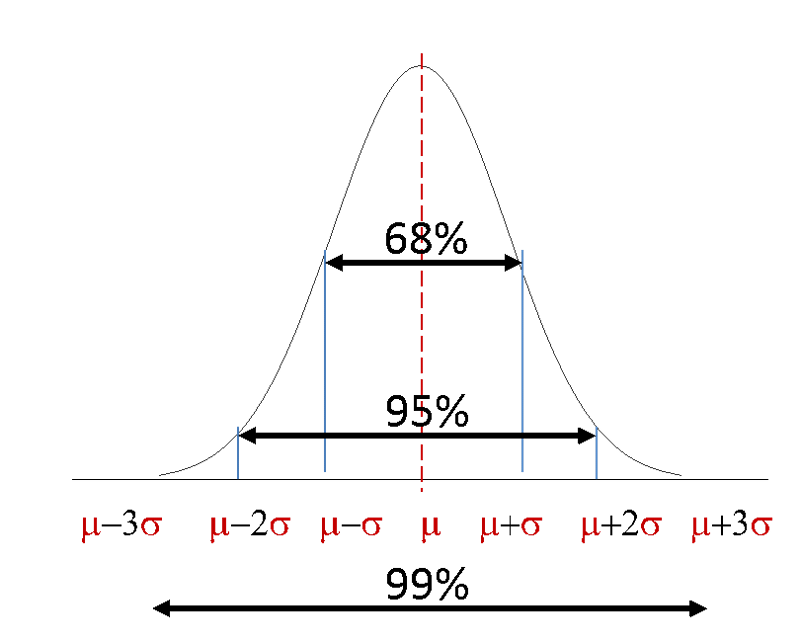

# Positively Skewed and Negatively Skewed Normal Distribution

###### Skewness

Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. 

If the curve is shifted to the left or to the right, it is said to be skewed. 

Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. 

A normal distribution has a skew of zero, while a lognormal distribution, for example, would exhibit some degree of right-skew.

The mean of positively skewed data will be greater than the median. In a distribution that is negatively skewed, the exact opposite is the case: the mean of negatively skewed data will be less than the median.

#### A Positive-Skewed distribution also known as right-skewed distribution as it's long tails lies in the right side of the distribution.
1. It has a long right tail.
2. The mean is also on the right side of the peak.

#### A Negatively-Skewed distribution also known as left-skewed distribution as it's long tail lies in the left side of the distribution.
1. It has a long left tail.
2. The mean is on the left side of the peak.

###### please refer below image for reference
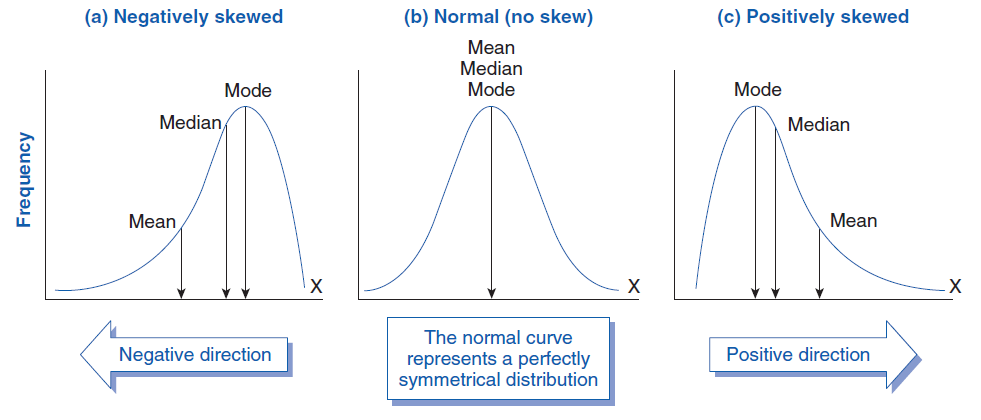

# Effect on Mean, Median and Mode due to Skewness

Briefly,

If the distribution of data is skewed to the left(negatively skewed), then the mean is less than the median, which is often less than the mode. 

 #### i.e, mean < median < mode

If the distribution of data is skewed to the right(positively skewed), then the mode is often less than the median, which is less than the mean.

 #### i.e, mode < median < mean
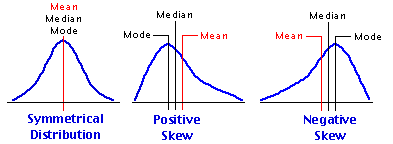

# QQ Plot and its implementation

A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that's roughly straight.
A 45-degree reference line is also plotted. If the two sets come from a population with the same distribution, the points should fall approximately along this reference line.

Heres a sample plot for reference
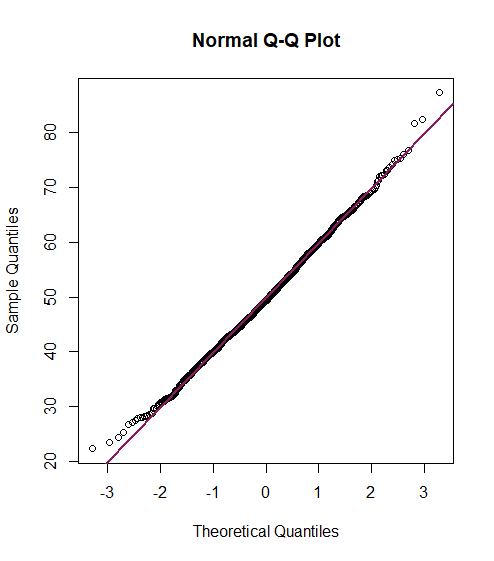

###### Now lets implement the qq plot to our given data frame

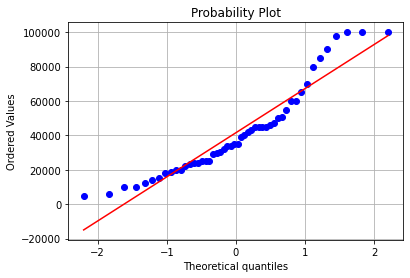

In [43]:
stats.probplot(my_dataset['Mthly_HH_Income'], dist="norm",plot=plt)
plt.grid()

# BOX_COX transformation and its implementation

A Box Cox transformation is a transformation of a non-normal dependent variables into a normal shape. 

It transforms our data so that it closely as it resembles a normal distribution.

Heres a sample transformation plot for reference
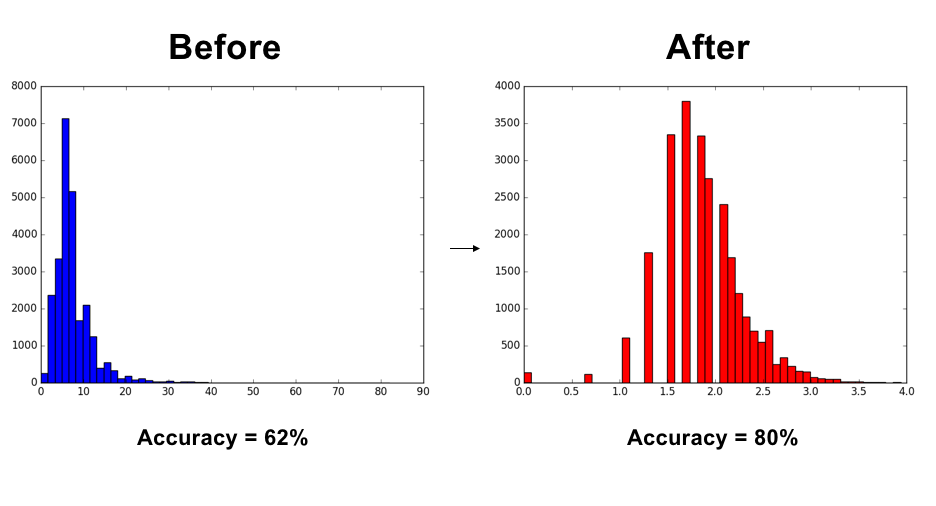

###### Now lets implement it on our dataframe

###### in the above example of q-q plot we have checked the normality of Mthly_HH_Income and now lets transform it more normal using box cox transformation and then we will check its normality

In [44]:
x_t_income,l_income=stats.boxcox(my_dataset['Mthly_HH_Income']) #BOX-COX Transformation implemented

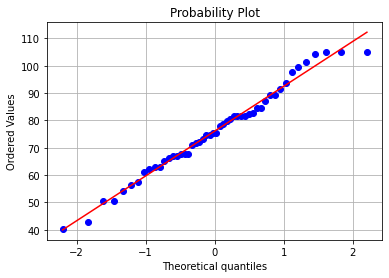

In [45]:
stats.probplot(x_t_income,dist='norm',plot=plt)
plt.grid()

###### After plotting, its is clearly shown there are more points along the 45-degree line than before the transformation. Therefore, by using box-cox transformation we can change the normality of the distribution and reduce the skewness.